In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import gymnasium as gym
import time
import os
from collections import defaultdict

In [2]:
def generate_epsilon_greedypolicy(epsilon,Q,env):
  def policy(state):
    if state not in Q:
      #take any action with equal probability
      return np.random.choice(env.action_space.n)
    else:
      #take the best action with probability 1-epsilon
      if np.random.random() > epsilon:
        return np.argmax(Q[state])
      else:
        return np.random.choice(env.action_space.n)
  return policy

In [3]:
def generate_episode(env, policy):
  episode = []
  state, _ = env.reset()
  done = False
  while not done:
    action = policy(state)
    tup = env.step(action)
    next_state, reward, done = tup[0], tup[1], tup[2]
    episode.append((state, action, reward))
    state = next_state
  return episode

  

In [4]:
def update_q_values(episode,Q,returns,counts):
  state_action_pairs = [(state,action) for state,action,_ in episode] 
  G = 0
  gamma = 1
  alpha = 0.1
  for i, (state, action, reward) in enumerate(episode[::-1]):
    G = gamma*G + reward
    if (state, action) not in state_action_pairs[:len(episode)-i-1]:
      counts[state,action] += 1
      #Q[state][action] = Q[state][action] + (1/counts[state,action])*(G - Q[state][action]) if we are using sample averages
      Q[state][action]  = Q[state][action] + alpha*(G - Q[state][action])# if we are using constant step size alpha

In [5]:
def mc_onpolicy(env, numeps,epsilon):
  Q = defaultdict(lambda: np.zeros(env.action_space.n))
  returns = defaultdict(float)
  counts = defaultdict(int)
  epsilon = 0.1
  for i in range(numeps):
    if i % 10000 == 0:
      print("Episode ", i)
    policy = generate_epsilon_greedypolicy(epsilon,Q,env)
    episode = generate_episode(env,policy)
    update_q_values(episode,Q,returns,counts)
    
  policy = generate_epsilon_greedypolicy(0,Q,env) 
  return Q, policy
  

In [6]:
numeps = 500000
env = gym.make("Blackjack-v1", sab = True)
Q, policy = mc_onpolicy(env, numeps,0.1)

Episode  0
Episode  10000
Episode  20000
Episode  30000
Episode  40000
Episode  50000
Episode  60000
Episode  70000
Episode  80000
Episode  90000
Episode  100000
Episode  110000
Episode  120000
Episode  130000
Episode  140000
Episode  150000
Episode  160000
Episode  170000
Episode  180000
Episode  190000
Episode  200000
Episode  210000
Episode  220000
Episode  230000
Episode  240000
Episode  250000
Episode  260000
Episode  270000
Episode  280000
Episode  290000
Episode  300000
Episode  310000
Episode  320000
Episode  330000
Episode  340000
Episode  350000
Episode  360000
Episode  370000
Episode  380000
Episode  390000
Episode  400000
Episode  410000
Episode  420000
Episode  430000
Episode  440000
Episode  450000
Episode  460000
Episode  470000
Episode  480000
Episode  490000


In [7]:
for state,action in Q.items():
  print(state,action)

(17, 6, 0) [-0.13166606 -0.64475423]
(10, 6, 0) [-0.29210394  0.29372738]
(19, 1, 0) [ 0.1467809  -0.73431358]
(19, 6, 0) [ 0.60621122 -0.43423286]
(20, 8, 0) [ 0.88711059 -0.92150298]
(10, 8, 0) [-0.86489716  0.20186937]
(7, 1, 0) [-0.94754423 -0.39177144]
(6, 5, 0) [-0.43302984 -0.01340287]
(20, 10, 0) [ 0.26107966 -0.85831402]
(12, 2, 0) [-0.66101856 -0.68711446]
(7, 10, 0) [-0.79770793 -0.5450527 ]
(19, 2, 0) [ 0.20817389 -0.77986516]
(17, 2, 0) [-0.11644051 -0.44994321]
(7, 2, 0) [-0.5200188 -0.1070596]
(17, 10, 0) [-0.93237635 -0.40892282]
(20, 7, 0) [ 0.70631386 -0.87866011]
(19, 10, 0) [ 0.05108524 -0.56889306]
(14, 10, 0) [-0.44267948 -0.75989031]
(16, 10, 0) [-0.82528943 -0.72203274]
(12, 10, 0) [-0.53539093 -0.83712608]
(18, 10, 0) [-0.25967465 -0.70503855]
(17, 4, 0) [ 0.134509   -0.64133291]
(17, 8, 0) [-0.35730838 -0.80623987]
(16, 8, 0) [-0.76950744 -0.73188158]
(15, 10, 0) [-0.8270379  -0.45015744]
(14, 1, 0) [-0.93500129 -0.63594965]
(13, 1, 0) [-0.71368498 -0.53651511

In [54]:
#getting V from Q
V_noace = defaultdict(float)
V_ace = defaultdict(float)
for state, actions in Q.items():
  #if the player has an ace
  if state[2]:
    V_ace[state] = np.max(actions)
  else:
    V_noace[state] = np.max(actions)

print("V_noace: ", V_noace)
print("V_ace: ", V_ace)

V_noace:  defaultdict(<class 'float'>, {(15, 10, 0): np.float64(-0.6800022433468846), (11, 10, 0): np.float64(0.15281012561800156), (16, 10, 0): np.float64(-0.48705173081201236), (20, 5, 0): np.float64(0.6255635655995696), (13, 5, 0): np.float64(0.10426894963179278), (12, 5, 0): np.float64(-0.2237092142014541), (17, 10, 0): np.float64(-0.5473019499491925), (14, 10, 0): np.float64(-0.8274040420479155), (20, 6, 0): np.float64(0.5788705792732572), (17, 3, 0): np.float64(-0.4305692001884228), (12, 3, 0): np.float64(0.01178385862113536), (20, 4, 0): np.float64(0.5640019744807863), (13, 10, 0): np.float64(-0.2355945579048746), (18, 6, 0): np.float64(0.16148840092745806), (17, 8, 0): np.float64(-0.6730327379870498), (15, 1, 0): np.float64(-0.9136163961613877), (21, 10, 0): np.float64(0.9281233884470774), (19, 7, 0): np.float64(0.8069551194153315), (14, 1, 0): np.float64(-0.569700147769966), (13, 9, 0): np.float64(-0.7352507090661425), (16, 7, 0): np.float64(-0.5457901565627231), (21, 4, 0): n

In [55]:
#plotting a 3D graph of the value function with respect to the player's sum and the dealer's showing card
player_scores = np.arange(12,22)
dealer_showing = np.arange(1,11)
print(player_scores), print(dealer_showing)
values_noace= np.zeros((len(player_scores),len(dealer_showing)))
values_ace= np.zeros((len(player_scores),len(dealer_showing)))
for i,player_score in enumerate(player_scores):
  for j,dealer_show in enumerate(dealer_showing):
    state = (player_score,dealer_show,False)
    if state in V_noace:
      values_noace[i,j] = V_noace[state]
      
    state = (player_score,dealer_show,True)
    if state in V_ace:
      values_ace[i,j] = V_ace[state]
    
      
    

[12 13 14 15 16 17 18 19 20 21]
[ 1  2  3  4  5  6  7  8  9 10]


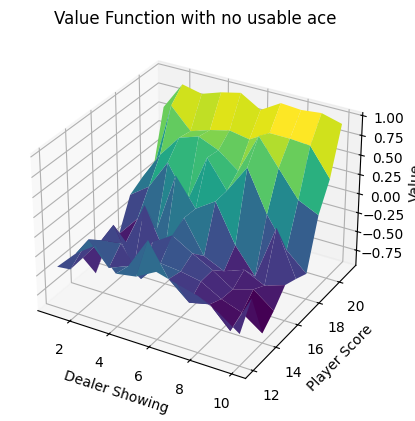

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(dealer_showing,player_scores) 
ax.plot_surface(X,Y,values_noace,rstride=1,cstride=1,cmap='viridis')  
ax.set_xlabel('Dealer Showing') 
ax.set_ylabel('Player Score')
ax.set_zlabel('Value')
ax.set_title('Value Function with no usable ace')
plt.show()  

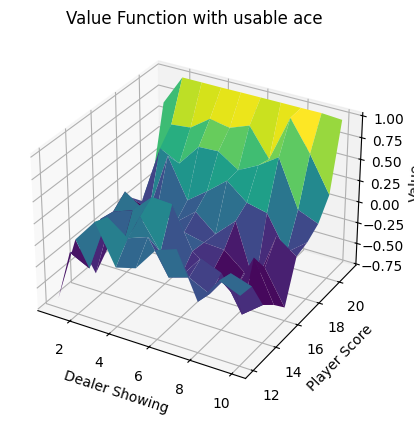

In [57]:
#plotting for usable ace
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X,Y = np.meshgrid(dealer_showing,player_scores)
ax.plot_surface(X,Y,values_ace,rstride=1,cstride=1,cmap='viridis')
ax.set_xlabel('Dealer Showing')
ax.set_ylabel('Player Score')
ax.set_zlabel('Value')
ax.set_title('Value Function with usable ace')
plt.show()
